<a href="https://colab.research.google.com/github/irfan7210/AirBnb-data-analysis/blob/main/individual_temp_Airbnb_booking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and  it is a mix between categorical and numeric values. </b>



# Let's first do necessary activity.

In [ ]:
#Loading important libraries for future analysis of data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
# Loading google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Attaching the path of file.
filepath ='/content/drive/MyDrive/Airbnb NYC 2019.csv'
df = pd.read_csv(filepath)

# Let's do data wrangling.

Let's understand about Airbnb before doing anything.
Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.
Airbnb stands for "Air Bed and Breakfast," a name that reflects the company’s early origins—its co-founders invited paying guests to sleep on an air mattress in their living room to help cover the rent.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Find the unique number of columns in the dateframe
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# find null values in dataframe
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
## Hence, the last_review and reviews_per_month has lots of null values so, remove these two columns
#  here we can remove column by two methods :-
#  delete method (del df['column_name']) or drop method (df = df.drop('column_name', axis=1)) 

df.drop(['last_review'], axis=1, inplace=True)


In [ ]:
#Showing the first five row of datasheet.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#looking for what is the columns (variables) present in the datasheet.
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df['name'].value_counts() 
#an interesting observation, looks like few listings have no particular host name as below observation!
#also few listings/property with same names has different hosts in different areas/neighbourhoods of a neighbourhood_group

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [ ]:
#same for host 
df['host_id'].nunique()
#looks some hosts are listed in multiple property

37457

In [ ]:
df['host_name'].nunique()
#it's looklike that same host are listed with diffrent diffrent id

11452

Observation(s):- We were trying to understand the two variables Host_id and host_name and their relationship with neighourhood and neighourhood group. We found that-A particular host listed on multiple properties as well as in many neighourhoods. And many hosts are listed in a particular property

## Let's find outliers in price data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


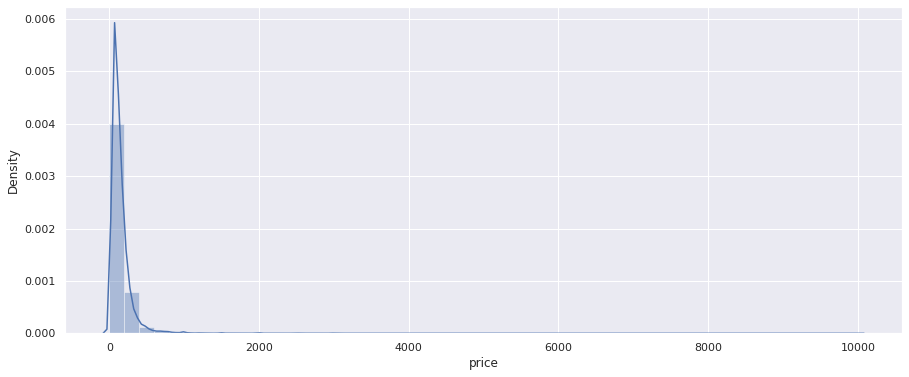

In [ ]:
# Let us analyse the price distribution using distplot
sns.set(rc={"figure.figsize": (15, 6)})
sns.distplot(df["price"], hist=True)

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables i.e. data distribution of a variable against the density distribution. In above graph we can see that our graph have right tail(right skewed) it means tha our most of data centered near peak of the graph but there is a some highly expensive price that leads to a seperate trends that's why our graph showing right trends.

In [ ]:
print("Skewness of price data: %f" % df['price'].skew())
print("Kurtosis of price data: %f" % df['price'].kurt())

Skewness of price data: 19.118939
Kurtosis of price data: 585.672879


We can say that the skewness indicates how much our underlying distribution deviates from the normal distribution or how much our distribution deviated from our median value since the normal distribution has skewness 0. The extreme positive skewness is not desirable for distribution, as a high level of skewness can cause misleading results.

Kurtosis refers to the degree of presence of outliers in the distribution.Kurtosis is a statistical measure, whether the data is heavy-tailed or light-tailed in a normal distribution.

A large kurtosis is associated with a high level of risk it preferable near zero.

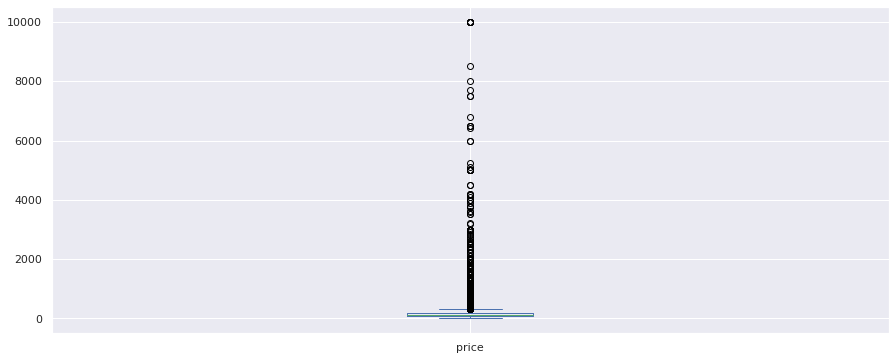

In [ ]:
df['price'].plot(kind="box")

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). in above plot we can see that most of the data is around the median but there is some data which is far away from the median. Our data has some outliers which are outside of Q1 and Q2 we have to remove this.

### Outliers Treatments

In [ ]:
#writing a outlier function for removing outliers!
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lower_bound,upper_bound = outlier_treatment(df['price'])
df[(df.price < lower_bound) | (df.price > upper_bound)] #Looking at the lower and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,1,9


In [ ]:
#subsetting only those rows having datapoints greater than lower range and lesser than upper range respectively

dfnp = df[(df.price>lower_bound) & (df.price<upper_bound)]
dfnp

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


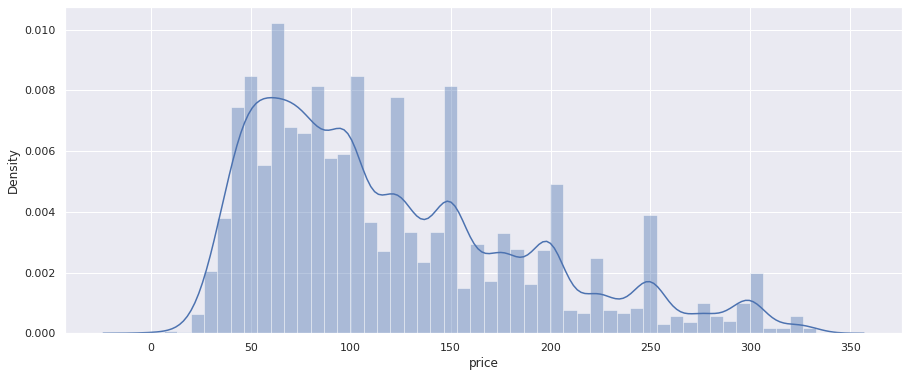

In [ ]:
#Now, use the distplot to show the price distribution
sns.set(rc={"figure.figsize": (15, 6)})
sns.distplot(dfnp["price"], hist=True)

In [ ]:
print("Skewness of price data: %f" % dfnp['price'].skew())
print("Kurtosis of price data: %f" % dfnp['price'].kurt())

Skewness of price data: 0.922925
Kurtosis of price data: 0.169543


After removing outliers now we can see that most of the data is between 50 to 300 and there is no right tail in our graph which shows that our data is close to median aur mean value. And the skewness is also less than 1 which shows that our data is normally distributed which is a good sign. And kurtos is also very close to zero, it means there are no outliers in our data and there is no risky data.

In [ ]:
dfnp['price'].describe()

count    45918.000000
mean       119.947014
std         68.117249
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        333.000000
Name: price, dtype: float64

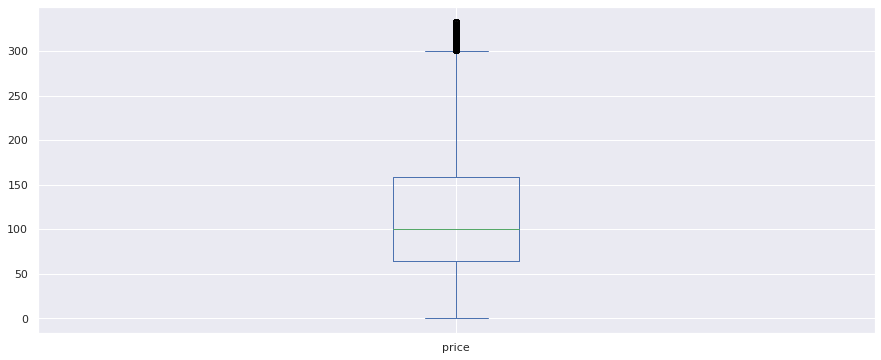

In [ ]:
#the boxplot for price now looks good without outliers!
dfnp['price'].plot(kind="box")

#Showing the correlation between different variables.

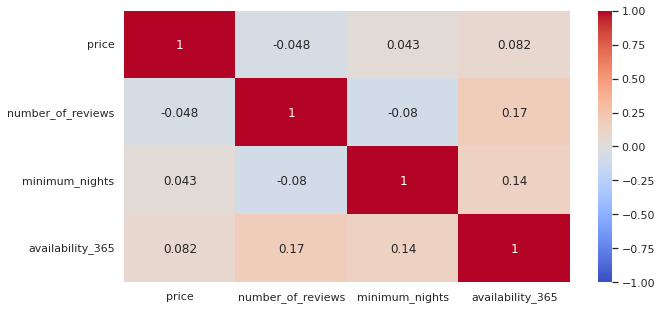

In [ ]:
# Use heatmap
corr_df = df[['price','number_of_reviews','minimum_nights','availability_365']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

Here we have found the correlation between different variables that is whether it is positively correlated or negatively correlated.If:-

-1: Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).

0: No correlation. The variables do not have a relationship with each other.

+1: Perfect positive correlation. The variables tend to move in the same direction

Here by seeing the coorelation matrix we can find that none of the variable is strongly correlated to other variable.

# What can we learn about different hosts and areas?:

##Find the highest number of host listings based on calculated_host_listings_count

In [ ]:
# Find the calculated host listings count
df1=df.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index().sort_values(by='calculated_host_listings_count', ascending=False).head()
df1

,host_name,calculated_host_listings_count
9781,Sonder (NYC),327
1356,Blueground,232
5336,Kara,121
5471,Kazuya,103
9780,Sonder,96


Text(0, 0.5, 'Host Listing Counts')

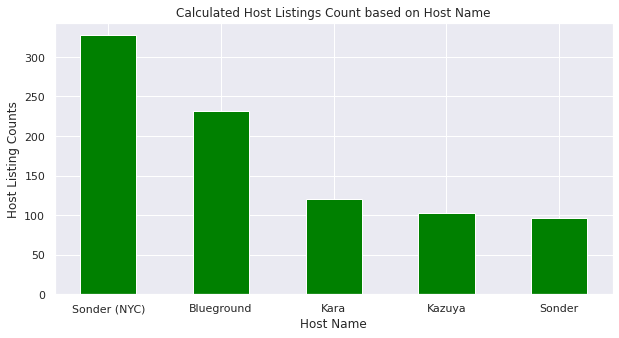

In [ ]:

plt.rcParams['figure.figsize'] = (10, 5)

plt.bar(df1['host_name'], df1['calculated_host_listings_count'], color ='green',
        width = 0.5)
plt.title("Calculated Host Listings Count based on Host Name")
plt.xlabel("Host Name")
plt.ylabel("Host Listing Counts")




```
# This is formatted as code
```

Here, Sonder (NYC), Blueground, Kara, and Kazuya has highest number of listings.

## Lets find the number of host listing count in Particular neighbourhood group

In [ ]:
# Find the number of listing areawise (neighbourhood) using groupby operation
df2 = df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)
df2

,neighbourhood_group,calculated_host_listings_count
2,Manhattan,277073
1,Brooklyn,45925
3,Queens,23005
0,Bronx,2437
4,Staten Island,865


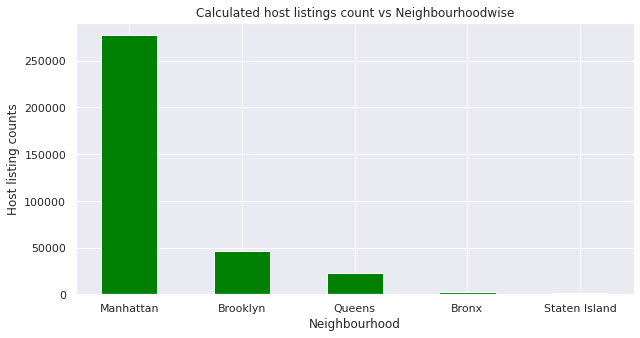

In [ ]:
fig = plt.figure(figsize = (10, 5))


plt.bar(df2['neighbourhood_group'], df2['calculated_host_listings_count'], color ='green',
        width = 0.5)
plt.title("Calculated host listings count vs Neighbourhoodwise")
plt.xlabel("Neighbourhood")
plt.ylabel("Host listing counts")

plt.show()

Here, the number of listings are highest in Manhattan  

## Number of unique host listing by name in particular neighbourhood group in the given data.







In [ ]:
df_va = df.groupby(['neighbourhood_group'])['host_name'].nunique()
df_va

neighbourhood_group
Bronx             652
Brooklyn         6075
Manhattan        5972
Queens           2424
Staten Island     220
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Number of different host in the neighbourhood group')

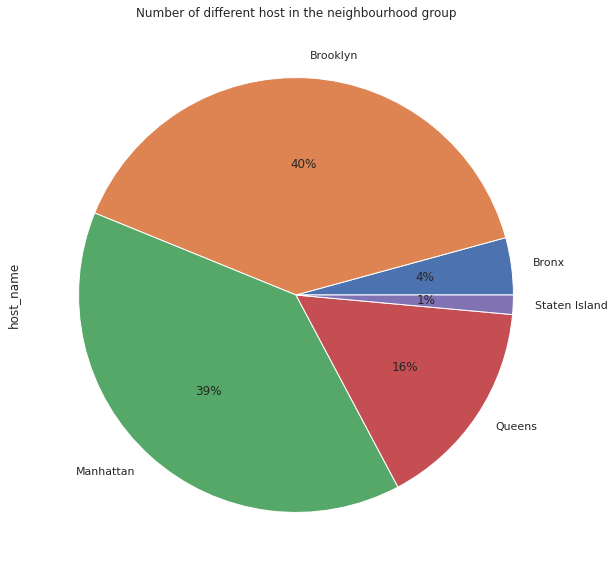

In [ ]:
plt.figure(figsize=(15,10))
# Here we are defining the plot in percentage
df_va.plot(kind='pie', autopct='%1.0f%%')
plt.title('Number of different host in the neighbourhood group')

## Top 3 active host in each neighbourhood group.





In [ ]:
newlist=df['neighbourhood_group'].unique()
y=list(newlist)

neighbourhood_group  host_name
Brooklyn             Michael      159
                     David        142
                     Sarah        133
Name: host_name, dtype: int64
neighbourhood_group  host_name   
Manhattan            Sonder (NYC)    327
                     Blueground      230
                     Michael         212
Name: host_name, dtype: int64
neighbourhood_group  host_name
Queens               Kazuya       79
                     David        50
                     Michael      37
Name: host_name, dtype: int64
neighbourhood_group  host_name
Staten Island        Maria        9
                     Amarjit S    8
                     Marina       8
Name: host_name, dtype: int64
neighbourhood_group  host_name
Bronx                Vie          13
                     Armando      10
                     Carol         9
Name: host_name, dtype: int64


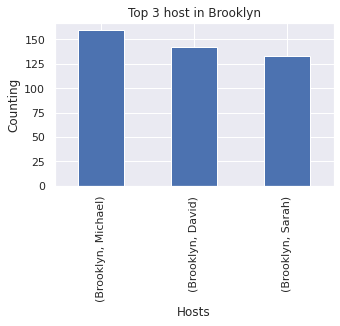

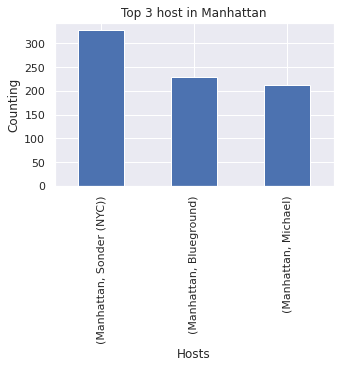

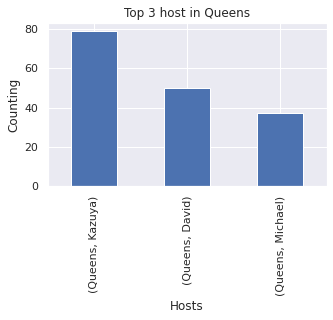

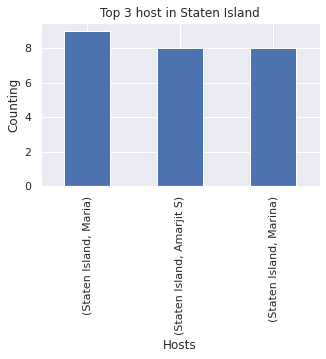

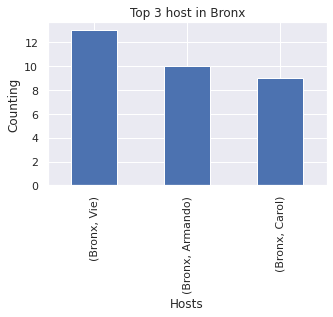

In [ ]:
# Applying for loop operation
for x in y:
  sub_1=df.loc[df['neighbourhood_group'] == x]
  p_sub1=sub_1.groupby(['neighbourhood_group'])['host_name'].value_counts().head(3)
  print(p_sub1)
  plt.figure(figsize=(5,3))
  p_sub1.plot(kind='bar')
  plt.title('Top 3 host in '+str(x))
  plt.xlabel("Hosts")
  plt.ylabel("Counting")
  




# Lets do the analysis on the basis of number of reviews

### Which are most reviewed neighbourood group.

In [ ]:
#sort the number of reviews relative to each neighbourhood to find the busiest area
busiest_areas =df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index().sort_values(by = 'number_of_reviews', ascending =False)
busiest_areas.set_index('neighbourhood_group')

,number_of_reviews
neighbourhood_group,
Brooklyn,486574
Manhattan,454569
Queens,156950
Bronx,28371
Staten Island,11541


Text(0, 0.5, 'Number of Reviews')

<Figure size 720x360 with 0 Axes>

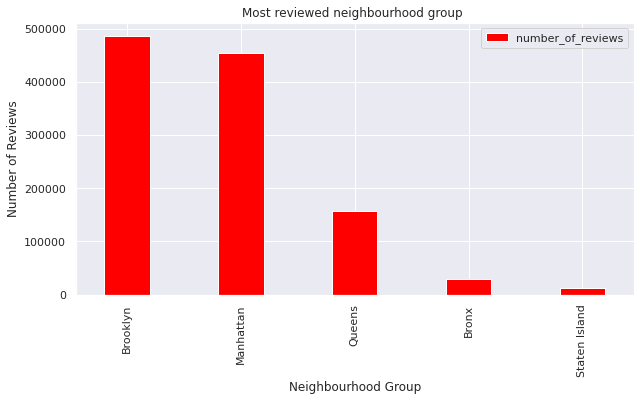

In [ ]:
# Depict the graph between 'number of reviews v/s Neighourhood group
fig = plt.figure(figsize = (10, 5))
busiest_areas.set_index('neighbourhood_group').plot(kind='bar', color='red', width=0.4)
plt.title("Most reviewed neighbourhood group ")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Reviews")

We found that Brooklyn is the most reviewed place followed by Manhattan and queens by this also we can say that brooklyn is the most popular place.

## Top 3 most reviewed premises in each neighbourhood group.

                                   neighbourhood_group neighbourhood  \
name                                                                   
Private brownstone studio Brooklyn            Brooklyn    Park Slope   
Loft Suite @ The Box House Hotel              Brooklyn    Greenpoint   
LG Private Room/Family Friendly               Brooklyn      Bushwick   

                                    number_of_reviews  
name                                                   
Private brownstone studio Brooklyn                488  
Loft Suite @ The Box House Hotel                  481  
LG Private Room/Family Friendly                   480  
                               neighbourhood_group neighbourhood  \
name                                                               
Great Bedroom in Manhattan               Manhattan        Harlem   
Beautiful Bedroom in Manhattan           Manhattan        Harlem   
Private Bedroom in Manhattan             Manhattan        Harlem   

                  

<Figure size 144x72 with 0 Axes>

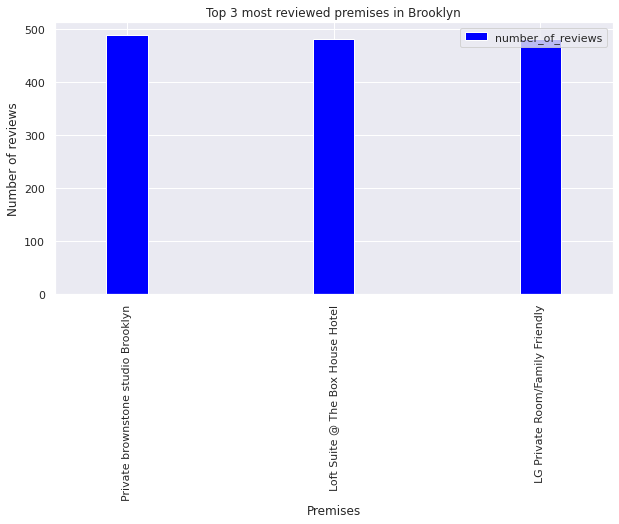

<Figure size 144x72 with 0 Axes>

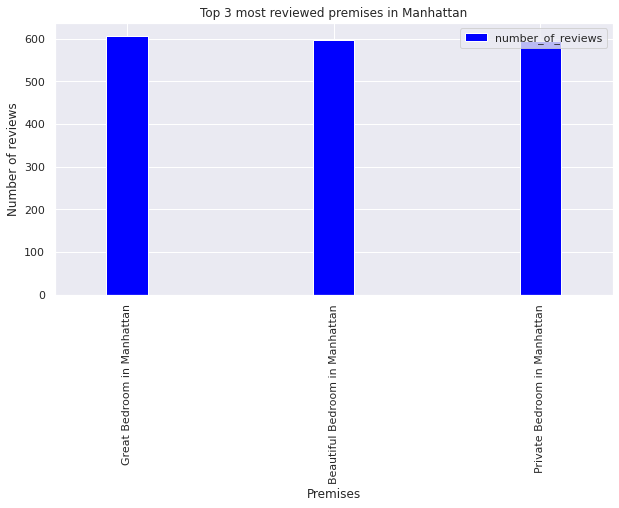

<Figure size 144x72 with 0 Axes>

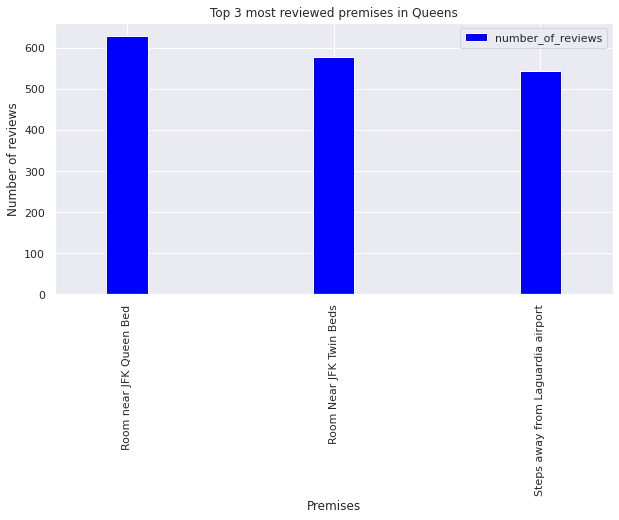

<Figure size 144x72 with 0 Axes>

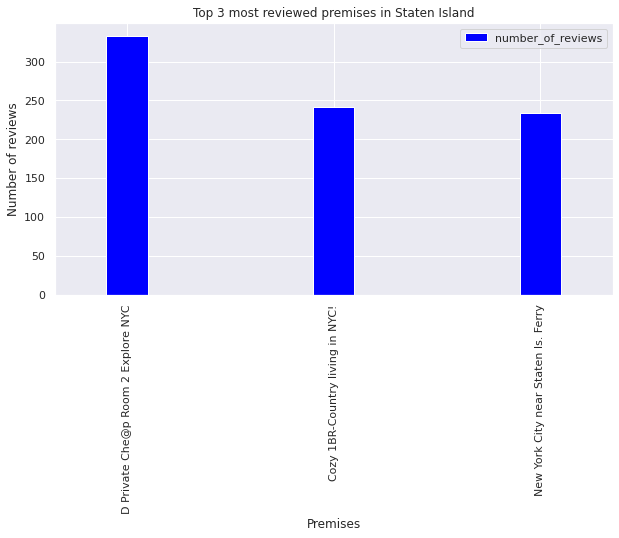

<Figure size 144x72 with 0 Axes>

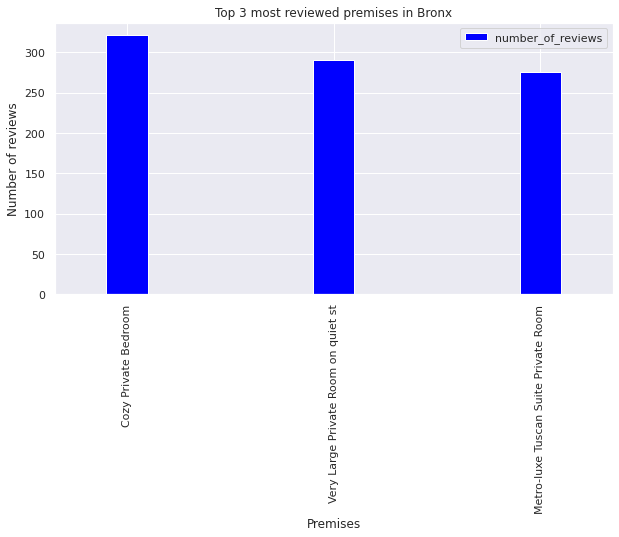

In [ ]:
for x in y:
  sub_1=df.loc[df['neighbourhood_group'] == x]
  p_sub1=sub_1.groupby(['neighbourhood_group','neighbourhood','name'])['number_of_reviews'].sum().reset_index().sort_values(by = 'number_of_reviews', ascending =False).head(3)
  m=p_sub1.set_index('name')
  print(m)
  plt.figure(figsize=(2,1))
  m.plot(kind='bar',color='blue', width=0.2)
  plt.title('Top 3 most reviewed premises in '+str(x))
  plt.xlabel("Premises")
  plt.ylabel("Number of reviews")


## Which type of rooms are  most prefered compared to other types based on the total number of reviews.

In [ ]:
preferable_room_type = df.groupby(['room_type'])['number_of_reviews'].sum().reset_index()

Text(0, 0.5, 'Average number of Reviews')

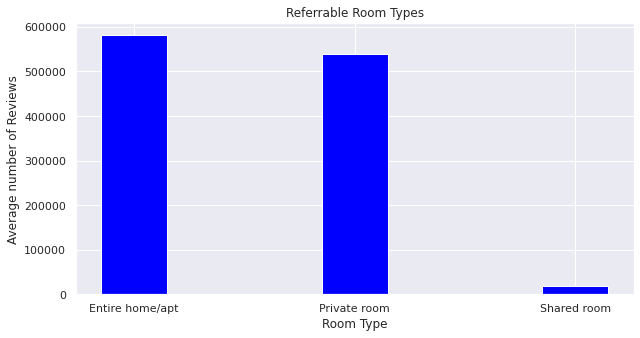

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(preferable_room_type['room_type'], preferable_room_type['number_of_reviews'], color='blue', width=0.3)

plt.title("Referrable Room Types")
plt.xlabel("Room Type")
plt.ylabel("Average number of Reviews")

# Let's play with availbility_365 data

---



## Finding the availability of rooms type in each neighbourhood group.

In [ ]:
# Find the availbility of rooms in the given neighbourhood.
m=df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().unstack()
m

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,158.000000,171.331288,154.216667
Brooklyn,97.205147,99.917983,178.007264
Manhattan,117.140996,101.845026,138.572917
Queens,132.267176,149.222716,192.186869
Staten Island,178.073864,226.361702,64.777778


Text(0, 0.5, ' Number of Days availability')

<Figure size 720x360 with 0 Axes>

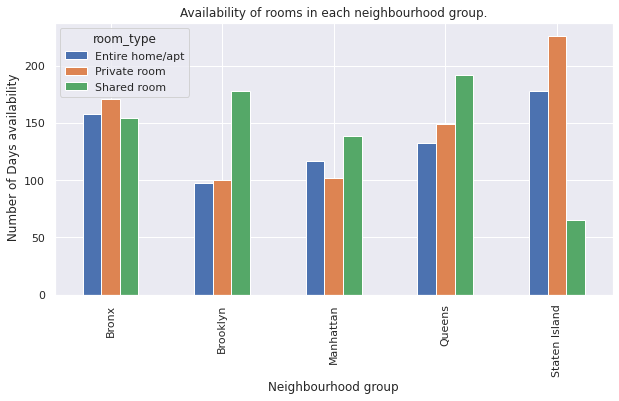

In [ ]:
plt.figure(figsize=(10,5))
m.plot(kind='bar')
plt.title("Availability of rooms in each neighbourhood group.")
plt.xlabel("Neighbourhood group")
plt.ylabel(" Number of Days availability")

We found that Staten island with Private room have highest avaibility followed by Staten island entire room and queens

In [ ]:
dfnp.head(0)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:
# Find the availbility of rooms in the given neighbourhood.
m=dfnp[['name','price','availability_365']].set_index('name')
print(m.sort_values(by='availability_365',ascending=False))

                                                   price  availability_365
name                                                                      
Clean & quiet apt home by the park                   149               365
318 58 st brooklyn ny 11220                          100               365
Super clean, Great location!!                        105               365
Modern 2-person room near Subway in Bushwick          32               365
Awsome room with private door to the deck!            44               365
...                                                  ...               ...
Private room in 2br apartment near subway (train)     70                 0
Roomy Riverside Apartment                             78                 0
Cozy Private Bedroom/Bathroom                        125                 0
Upper west side gem                                  330                 0
Studio Near Times Square                             175                 0

[45918 rows x 2 columns]

# Let's play with price data.

## Distribution of Price in each neighbourhood group.

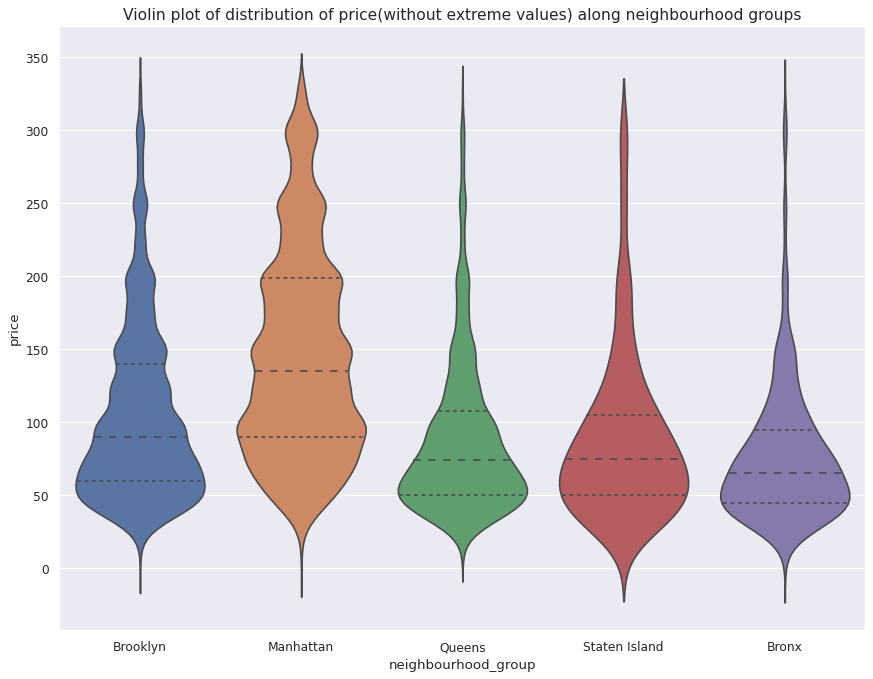

In [ ]:
#Now let's understand the distribution of price(without extreme values) along neighbourhood groups
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='neighbourhood_group', y='price', data=dfnp, scale='width', inner='quartile')

# Decoration
plt.title('Violin plot of distribution of price(without extreme values) along neighbourhood groups', fontsize=14)
plt.show()

In above voilin plot is showing which price is most popular like in Brooklyn most of the price varies between 35 to 80 that is the most popular range

##Which neighbourhood group are most expensive relative to others?

In [ ]:
# Find expensive areas based on its price and room types
expensive_areas_list = dfnp.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
expensive_areas_list

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,112.195592,60.595679,47.254237
Brooklyn,148.202080,70.283443,48.036496
Manhattan,181.621136,98.057700,75.939785
Queens,131.328388,65.732319,46.989691
Staten Island,121.089286,62.292553,57.444444


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

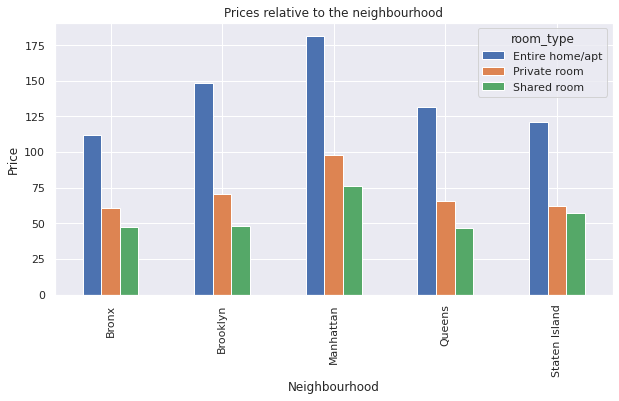

In [ ]:
# creating the bar plot to show the prices in different neighbourhood considering the room type
plt.figure(figsize=(10,5))
expensive_areas_list.plot(kind='bar')
plt.title("Prices relative to the neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")


Manhattan has more listed properties with Entire home/apt followed by Brooklyn.

Private rooms are more in Brooklyn followed by Manhattan.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

let's check about Which hosts are charging more relative to others without outliers.

##Average money spend by people on each room types.

In [ ]:
dict_ = {}

types_of_rooms = list(dfnp['room_type'].unique())
for rooms in types_of_rooms:
    dict_[rooms] = dfnp[dfnp['room_type'] == rooms].price.sum()/dfnp[dfnp['room_type'] == rooms].price.count()

key, value =  list(dict_.keys()), list(dict_.values())

k = pd.DataFrame({'Rooms': key, 'Average Price': value})

k

,Rooms,Average Price
0,Private room,79.018503
1,Entire home/apt,162.489466
2,Shared room,59.293497


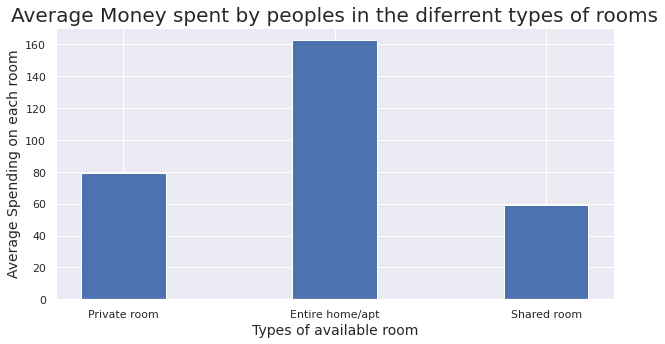

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(k['Rooms'], k['Average Price'],
        width = 0.4)
 
plt.xlabel("Types of available room", fontsize = 14)
plt.ylabel("Average Spending on each room", fontsize = 14)
plt.title("Average Money spent by peoples in the diferrent types of rooms", fontsize = 20)
plt.show()

## Which hosts are charging more relative to others?

In [ ]:
# Find the mean price of each neighbourhood considering the room types
most_expensive_hosts = dfnp.groupby(['host_name','room_type'])['price'].mean().reset_index().sort_values(by='price', ascending=False)
most_expensive_hosts_list= most_expensive_hosts.set_index('host_name').head(15)
most_expensive_hosts_list

,room_type,price
host_name,,
Aleszea,Entire home/apt,333.0
Cullen,Entire home/apt,333.0
Danilo & Larissa,Entire home/apt,332.0
Daia,Entire home/apt,329.0
Unai,Entire home/apt,329.0
Christine & Philip,Entire home/apt,329.0
Agate,Entire home/apt,325.0
Mala,Entire home/apt,325.0
Kris -,Entire home/apt,325.0


Text(0, 0.5, 'Price')

<Figure size 720x360 with 0 Axes>

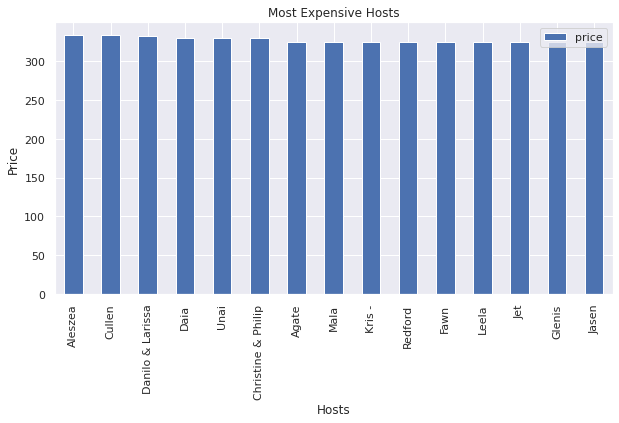

In [ ]:
#plot a bar graph to depict the host lists who are charging more
plt.figure(figsize=(10,5))
 

most_expensive_hosts_list.plot(kind='bar')
plt.title("Most Expensive Hosts")
plt.xlabel("Hosts")
plt.ylabel("Price")

##Relation between Price and number of reviews of each room type.

In [ ]:
#Here we are apply
occupancies_of_rooms_based_on_price= dfnp.groupby(['price','room_type'])['number_of_reviews'].sum().reset_index()
occupancies_of_rooms_based_on_price
  

,price,room_type,number_of_reviews
0,0,Entire home/apt,3
1,0,Private room,367
2,0,Shared room,7
3,10,Entire home/apt,187
4,10,Private room,52
...,...,...,...
665,330,Private room,4
666,331,Entire home/apt,0
667,332,Entire home/apt,1
668,333,Entire home/apt,321


Text(0.5, 1.0, 'Number of Reviews relative v/s Cost(Price)')

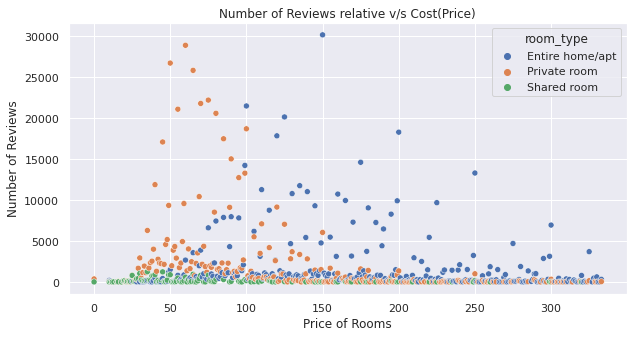

In [ ]:
# scatter plot between the number of reviews and price considering room types
sns.scatterplot(x='price', y='number_of_reviews', hue='room_type', data=occupancies_of_rooms_based_on_price)
plt.xlabel("Price of Rooms")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews relative v/s Cost(Price)")

So, least expensive rooms are booked more, and enitre home/apt is booked more.

## Provide a competitive market price for a newly added Airbnb listing given its attributes

In [ ]:
dict_1 = {}
dict_2 = {}
dfnp['price_for_a_night'] = dfnp['price'] / dfnp['minimum_nights']

neighbourhood = list(dfnp['neighbourhood'].unique())

for n in neighbourhood:
    if n not in dict_1.keys():
        dict_1[n] = dfnp[dfnp['neighbourhood'] == n].price_for_a_night.mean()


neighbourhood_group = list(dfnp['neighbourhood_group'].unique())

for n in neighbourhood_group:
    if n not in dict_2.keys():
        dict_2[n] = dfnp[dfnp['neighbourhood_group'] == n].price_for_a_night.mean()


print(dict_1)
print(dict_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


{'Kensington': 42.81525768804838, 'Midtown': 73.41729053480252, 'Harlem': 50.296447364253204, 'Clinton Hill': 52.040221862781344, 'East Harlem': 58.13094779864046, 'Murray Hill': 55.543487372737154, 'Bedford-Stuyvesant': 43.284782799020014, "Hell's Kitchen": 76.02861129036043, 'Upper West Side': 60.23366128903398, 'Chinatown': 64.52289904306365, 'South Slope': 57.03741773591157, 'West Village': 82.69951459608352, 'Williamsburg': 54.734464735336346, 'Fort Greene': 51.67128367305699, 'Chelsea': 75.04383412839269, 'Crown Heights': 46.10184809945614, 'Park Slope': 55.95446063750978, 'Windsor Terrace': 51.33492747157418, 'Inwood': 43.40625753862996, 'East Village': 69.96206479968006, 'Greenpoint': 52.11109443176076, 'Bushwick': 39.0804538366811, 'Flatbush': 38.595639166312765, 'Lower East Side': 68.23518095398245, 'Prospect-Lefferts Gardens': 43.688992499068824, 'Long Island City': 57.35244082051009, 'Kips Bay': 58.17320309687502, 'SoHo': 79.4526376200967, 'Upper East Side': 61.253929771433

In [ ]:
#DataFrame contains competetive price in the unique neighbourhoods group
pd.DataFrame({'Neighbourhood Group' : list(dict_2.keys()), 'Competetive Price' : list(dict_2.values())})

,Neighbourhood Group,Competetive Price
0,Brooklyn,47.964160
1,Manhattan,63.821351
2,Queens,50.627225
3,Staten Island,48.854879
4,Bronx,44.932373


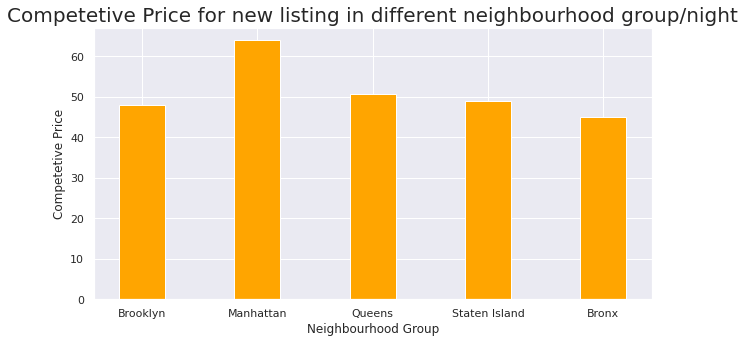

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(list(dict_2.keys()),list(dict_2.values()),color='orange', width=0.4)
plt.title("Competetive Price for new listing in different neighbourhood group/night", fontsize = 20)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Competetive Price')
plt.show() 

# On an average for how many nights people stayed in each room_types.

Text(0, 0.5, 'Room Types')

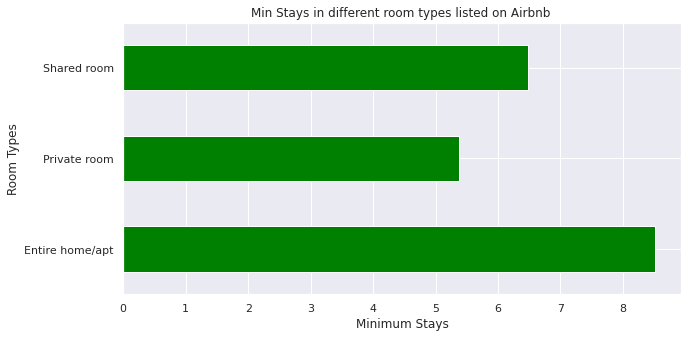

In [ ]:
df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh' ,color='green')

plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Minimum Stays')
plt.ylabel('Room Types')

Here we can see that people preferred to stays more in Entire home apartment around 8 days followed by shared room around 6 days and Private room 5 days.

# Let's do analysis with latitude and longitude data.

##Plotting the latitude and longitude of each neighbourhood group.

Text(0.5, 1.0, 'Location Co-ordinates of each neighbourhood group')

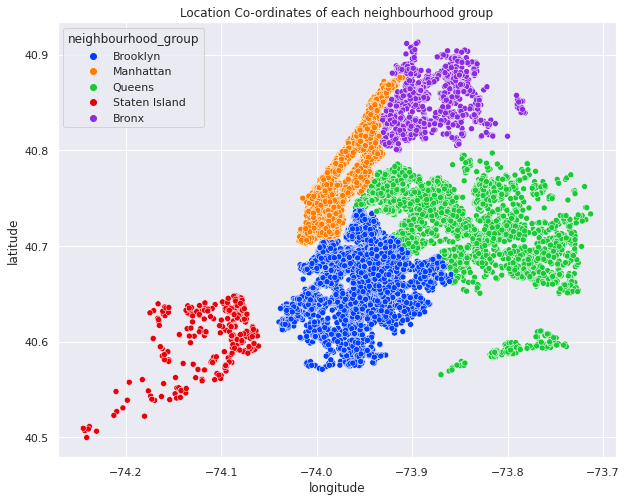

In [ ]:
#here we have used scatter plot so that we can easily draw the map of each neighbourhood group
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates of each neighbourhood group')


By seeing the plot we can see that Queens covers the large area and Staten Island covers small area as compare to other neighbourhood group.

##Let's see the distribution of room_types in each neighbourhood group.

### In Brooklyn

Text(0.5, 1.0, 'Location Co-ordinates of Brooklyn with its room types')

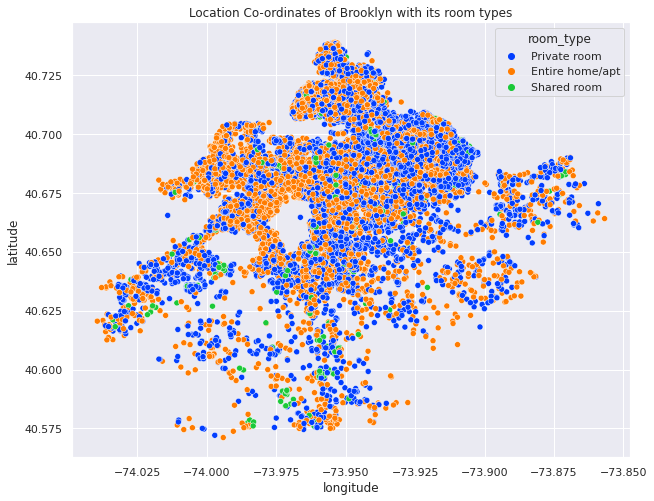

In [ ]:
# Here we have used iloc so that we can make seperate dataframe of particular neighbourhood group.
sub_1=df.loc[df['neighbourhood_group'] =='Brooklyn']
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=sub_1, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location Co-ordinates of Brooklyn with its room types')

### In Bronx

Text(0.5, 1.0, 'Location Co-ordinates of Bronx with its room types')

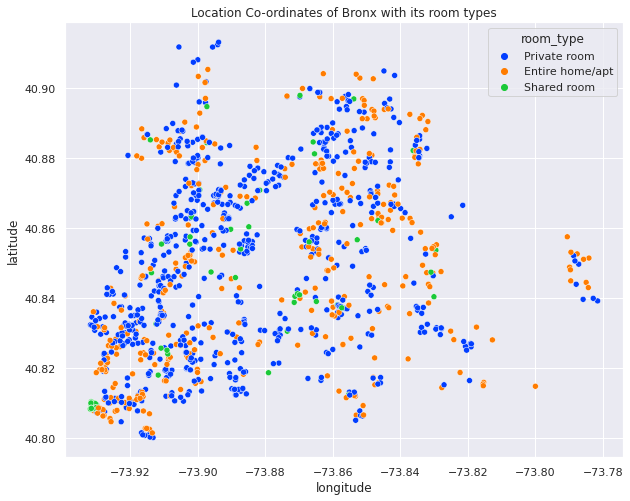

In [ ]:
sub_1=df.loc[df['neighbourhood_group'] =='Bronx']
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=sub_1, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location Co-ordinates of Bronx with its room types')

### In Manhattan

Text(0.5, 1.0, 'Location Co-ordinates of Manhattan with its room types')

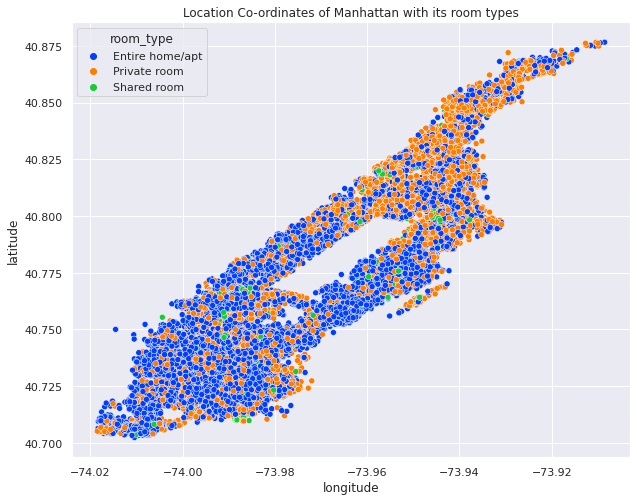

In [ ]:
sub_1=df.loc[df['neighbourhood_group'] =='Manhattan']
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=sub_1, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location Co-ordinates of Manhattan with its room types')

### In Staten Island

Text(0.5, 1.0, 'Location Co-ordinates of Staten Island with its room types')

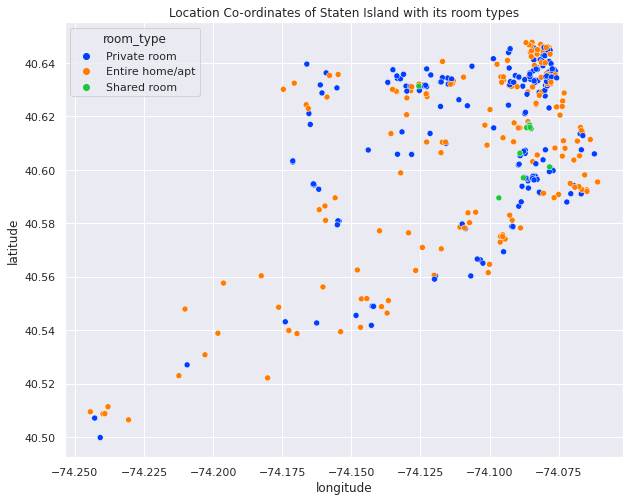

In [ ]:
sub_1=df.loc[df['neighbourhood_group'] =='Staten Island']
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=sub_1, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location Co-ordinates of Staten Island with its room types')

### In Queens

Text(0.5, 1.0, 'Location Co-ordinates of Queen swith its room types')

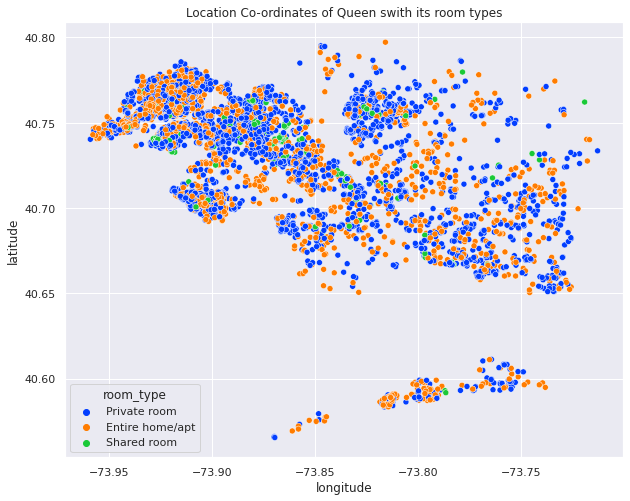

In [ ]:
sub_1=df.loc[df['neighbourhood_group'] =='Queens']
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=sub_1, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location Co-ordinates of Queen swith its room types')